In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
## Creating data to view and fit
#Create the features
X = np.array([-10, -5, 0, 5, 10, 15, 20])

# Create the labels
y = np.array([1.0, 6.0, 11.0, 16.0, 21.0, 26.0, 31.0])

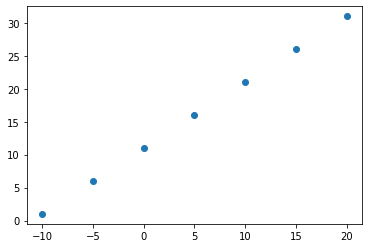

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([False, False, False, False, False, False, False])

Input and Output shapes

In [5]:
# Create a demo tensor 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-10, 1.0)

In [9]:
# Turn the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(7,), dtype=int64, numpy=array([-10,  -5,   0,   5,  10,  15,  20])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 1.,  6., 11., 16., 21., 26., 31.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers
2. Compiling a model - define the loss function
3. Fitting a model


In [11]:
# Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

# 3. Fit the model
model.fit(X, y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 1s 672ms/step - loss: 13.1497 - mae: 13.1497
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 12.8897 - mae: 12.8897
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.6297 - mae: 12.6297
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 12.3697 - mae: 12.3697
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 12.1097 - mae: 12.1097


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(7,), dtype=int64, numpy=array([-10,  -5,   0,   5,  10,  15,  20])>,
 <tf.Tensor: shape=(7,), dtype=float64, numpy=array([ 1.,  6., 11., 16., 21., 26., 31.])>)

In [14]:
# Try and make a prediction using a model
y_pred = model.predict([17.0])
y_pred

array([[13.991019]], dtype=float32)

In [15]:
y_pred + 11.5

array([[25.49102]], dtype=float32)

Improving Our Model

1. Creating a model - add more layers, increase the hidden layers, change the activation of each layer.
2. Compiling a model - change the optimization function or learning rate of the optimization function.
3. Fitting a model - increase the number of epochs, increase the amount of data to learn from.

In [16]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

# 3. Fit the model
model.fit(X, y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 286ms/step - loss: 13.1497 - mae: 13.1497
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8897 - mae: 12.8897
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6297 - mae: 12.6297
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3697 - mae: 12.3697
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1097 - mae: 12.1097
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8497 - mae: 11.8497
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5897 - mae: 11.5897
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3297 - mae: 11.3297
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0697 - mae: 11.0697
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8097 - mae: 10.8097
Epoch 11/100
1/1 [==============================] - 0s 7m

In [17]:
model.predict([17])

array([[26.516663]], dtype=float32)

In [18]:
# Rebuilding the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation="relu"),
                             tf.keras.layers.Dense(1, activation="relu"),
                             tf.keras.layers.Dense(1, activation="relu"),
                             tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ['mae'])

model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 467ms/step - loss: 12.6028 - mae: 12.6028
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3989 - mae: 12.3989
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1881 - mae: 12.1881
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9696 - mae: 11.9696
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7430 - mae: 11.7430
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5082 - mae: 11.5082
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2648 - mae: 11.2648
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0125 - mae: 11.0125
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7508 - mae: 10.7508
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4795 - mae: 10.4795
Epoch 11/100
1/1 [==============================] - 0s 7m

In [19]:
model.predict([17])

array([[28.863121]], dtype=float32)

The learning rate is the most important hyperparameter in most Neural Network Models

### Evaluating a model

A typical workflow:
Build a model - Fit it - Evaluate it - Tweak it - Fit it - Evaluate it ...

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset
y = X + 11
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-89, -85, -81, -77, -73, -69, -65, -61, -57, -53, -49, -45, -41,
       -37, -33, -29, -25, -21, -17, -13,  -9,  -5,  -1,   3,   7,  11,
        15,  19,  23,  27,  31,  35,  39,  43,  47,  51,  55,  59,  63,
        67,  71,  75,  79,  83,  87,  91,  95,  99, 103, 107], dtype=int32)>

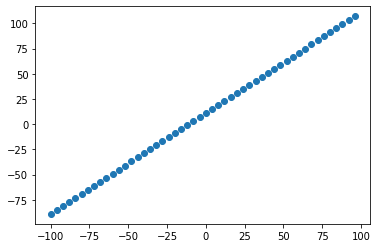

In [22]:
plt.scatter(X, y)

### The 3 set concept
Training, Validation, Testing


In [23]:
# Check the length of the samples
len(X)

50

In [24]:
# Split the data into train and test set
X_train = X[:40]
y_train = X[:40]

X_test = y[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

Visualizing the data

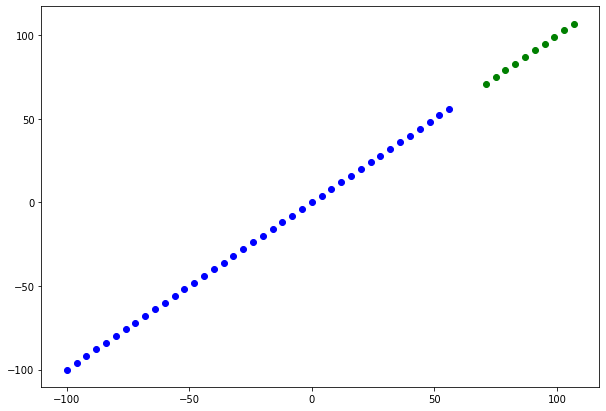

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c= 'b', label= "Training data")

plt.scatter(X_test, y_test, c='g', label= "Testing data")

In [26]:
# 1. Create a model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 21.9063 - mae: 21.9063
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6145 - mae: 9.6145
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2363 - mae: 11.2363
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0251 - mae: 11.0251
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.5269 - mae: 11.5269
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2410 - mae: 9.2410
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 6.2838 - mae: 6.2838
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 5.8323 - mae: 5.8323
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 11.0570 - mae: 11.0570
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7661 - mae: 13.7661
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3155 - mae: 15.3155
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7969 - mae: 12.7969
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.6829 - mae: 14.6829
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 14.4182 - mae: 14.4182
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2908 - mae: 15.2908
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1122 - mae: 13.1122
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8898 - mae: 9.8898
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 8.2459 - mae: 8.2459
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 14.4503 - mae: 14.4503
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1168 - mae: 17.1168
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total Params - Total number of parameters in the network
* Trainable parameters - These are the parameters (patterns)
* Non-trainbale parameters - These are the parameters that are updated during training

In [30]:
# 1. Create a model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape= [1], name="input_layer"),
                             tf.keras.layers.Dense(1, name="output_layer")
], name = "First_Of_Many_Models")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 75.1313 - mae: 75.1313
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 18.2270 - mae: 18.2270
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 10.3736 - mae: 10.3736
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 15.3398 - mae: 15.3398
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 20.1786 - mae: 20.1786
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 33.9672 - mae: 33.9672
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 5.7561 - mae: 5.7561
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 14.0040 - mae: 14.0040
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 34.0812 - mae: 34.0812
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8768 - mae: 12.8768
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [31]:
model.summary()

Model: "First_Of_Many_Models"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


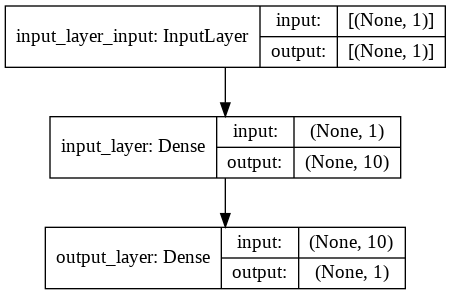

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes = True)

### Visualizing our model's predictions

In [33]:
 y_preds = model.predict(X_test)
 y_preds

array([[ 80.15794 ],
       [ 84.68225 ],
       [ 89.206566],
       [ 93.73089 ],
       [ 98.255196],
       [102.77952 ],
       [107.30382 ],
       [111.82815 ],
       [116.352455],
       [120.87678 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 71,  75,  79,  83,  87,  91,  95,  99, 103, 107], dtype=int32)>

In [35]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c = 'g', label = "Testing data")
  plt.scatter(test_data, predictions, c='r', label = 'Predictions')
  plt.legend();


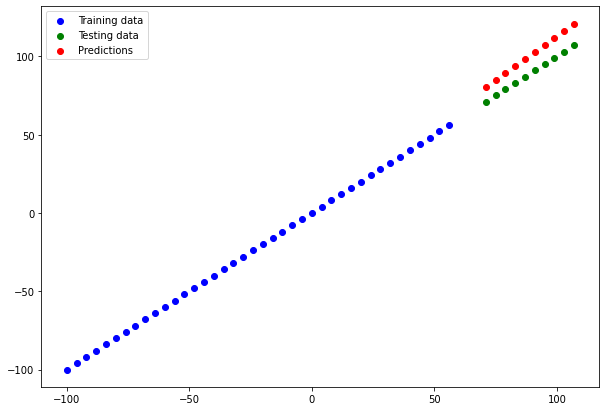

In [36]:
plot_predictions()

### Evaluating our model's prediction with evaluation metrics
* MAE
* MSE

In [37]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 11.5174 - mae: 11.5174


[11.517356872558594, 11.517356872558594]

In [38]:
# Calculate the mean absolute error

mean_absolute_error = tf.metrics.mean_absolute_error(y_test, y_preds)
mean_absolute_error

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11.936823, 10.46355 , 10.      , 10.546178, 12.102078, 14.667711,
       18.303818, 22.828148, 27.352453, 31.876776], dtype=float32)>

In [39]:
y_preds = tf.constant(y_preds)
y_preds

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 80.15794 ],
       [ 84.68225 ],
       [ 89.206566],
       [ 93.73089 ],
       [ 98.255196],
       [102.77952 ],
       [107.30382 ],
       [111.82815 ],
       [116.352455],
       [120.87678 ]], dtype=float32)>

In [40]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 80.15794 ,  84.68225 ,  89.206566,  93.73089 ,  98.255196,
       102.77952 , 107.30382 , 111.82815 , 116.352455, 120.87678 ],
      dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 71,  75,  79,  83,  87,  91,  95,  99, 103, 107], dtype=int32)>

In [42]:
mean_absolute_error = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))
mean_absolute_error

<tf.Tensor: shape=(), dtype=float32, numpy=11.517356>

In [43]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=134.91747>

In [44]:
# Make some functions to use MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_test, y_pred=tf.squeeze(y_pred))

In [45]:
# Make some functions to use MAE and MSE
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true= y_test, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data for your model to train on
2. Make your model larger (using a complex model)
3. Train the model for longer

Modelling experiments:
1. model_1 - same as original model
2. model_2 - trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

In [46]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5986 - mae: 9.5986
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 14.3823 - mae: 14.3823
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 23.6866 - mae: 23.6866
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 23.0452 - mae: 23.0452
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 6.3897 - mae: 6.3897
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 16.3884 - mae: 16.3884
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 17.1337 - mae: 17.1337
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 20.9187 - mae: 20.9187
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 37.5459 - mae: 37.5459
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 22.9089 - mae: 22.9089
Epoch 11/100
2/2 [==============================] - 0s 10ms/ste

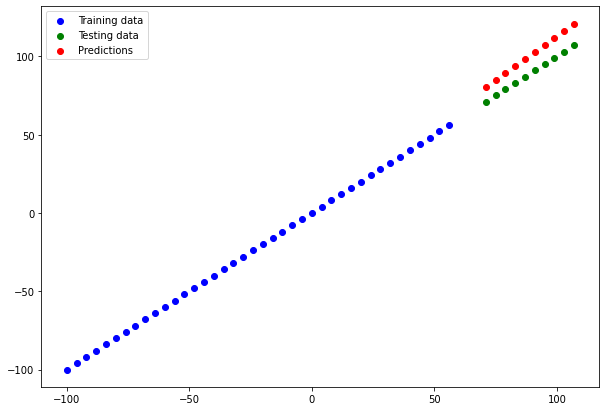

In [47]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds)

In [48]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[40.47425 ],
        [42.754494],
        [45.034733],
        [47.314972],
        [49.59521 ],
        [51.87545 ],
        [54.15569 ],
        [56.43593 ],
        [58.716167],
        [60.99641 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([40.47425 , 42.754494, 45.034733, 47.314972, 49.59521 , 51.87545 ,
        54.15569 , 56.43593 , 58.716167, 60.99641 ], dtype=float32)>)

In [49]:
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=38.264668>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1488.585>)

Build Model_2

* 2 dense layers, trained for 100 epochs

In [50]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 28.5179 - mse: 1169.6489
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 23.5481 - mse: 795.0547
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 30.3879 - mse: 1480.5624
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 30.0180 - mse: 1317.8606
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.3066 - mse: 220.3870
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9600 - mse: 316.0143
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 15.8804 - mse: 361.8178
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 17.7428 - mse: 484.7431
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 46.8813 - mse: 3729.8262
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 30.8266 - mse: 1382.1414
Epoch 11/100
2/2 [=========================

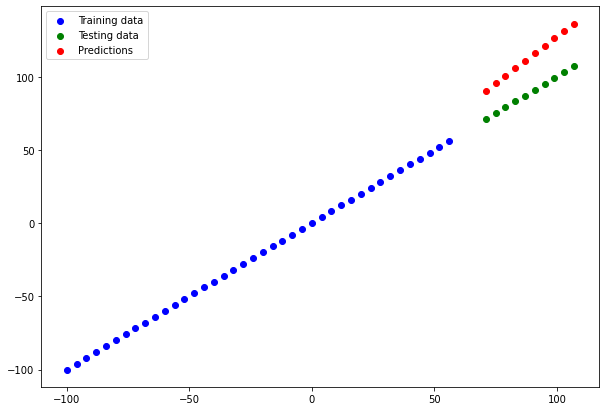

In [51]:
# Make and plot prediction of model 2

y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions= y_pred_2)

In [52]:
# Calculate the model_2 metrics

mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=24.276653>,
 <tf.Tensor: shape=(), dtype=float32, numpy=599.2369>)

In [53]:
# Build Model_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ['mse'])

model_3.fit(X_train, y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 28.5179 - mse: 1169.6489
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 23.5481 - mse: 795.0547
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 30.3879 - mse: 1480.5624
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 30.0180 - mse: 1317.8606
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 11.3066 - mse: 220.3870
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9600 - mse: 316.0143
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 15.8804 - mse: 361.8178
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 17.7428 - mse: 484.7431
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 46.8813 - mse: 3729.8262
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 30.8266 - mse: 1382.1414
Epoch 11/500
2/2 [==========================

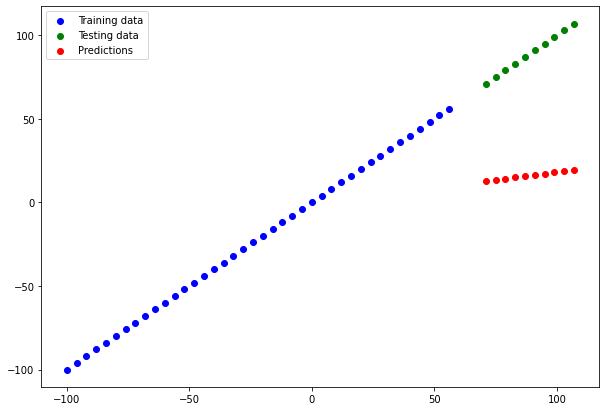

In [54]:
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [55]:
mse_3 = mse(y_test, y_pred_3)
mae_3 = mae(y_test, y_pred_3)

mse_3, mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=5406.426>,
 <tf.Tensor: shape=(), dtype=float32, numpy=72.92698>)

## Comparing the results

In [56]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,38.264668,1488.584961
1,model_2,24.276653,599.236877
2,model_3,72.926979,5406.425781


### Looks like Model_2 performed best...

In [57]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

-- Learn to use the TensorBoard: To help track modelling experiments.

-- Weights & Biases: To track ML experiments.

# Saving our models

This helps us use them outside of google colab.

There are two different format we can save our model to:

1. the SavedModel format

2. The HDF5 format.

In [58]:
# SavedModel Format

model_2.save('best_model_savedmodel_format')

INFO:tensorflow:Assets written to: best_model_savedmodel_format/assets


In [59]:
# Saved HDF5 Model

model_2.save('Best_Model_HDF5_Format.h5')

## Loading a Saved Model

In [60]:
# Load in the SavedModel format model

loaded_SavedModel_Format = tf.keras.models.load_model('/content/best_model_savedmodel_format')
loaded_SavedModel_Format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compare model_2 prediction with savedModel prediction

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_Format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_Format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [63]:
# Load in the SavedHDF5 format model

loaded_h5_Format = tf.keras.models.load_model('/content/Best_Model_HDF5_Format.h5')
loaded_h5_Format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compare model_2 prediction with h5 prediction

model_2_preds = model_2.predict(X_test)
loaded_h5_Format_preds = loaded_h5_Format.predict(X_test)
model_2_preds == loaded_h5_Format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a Model from Google Colab

1. Go to the files tab and right click and "download"
2. Use code
3. Save in GoogleDrive after mounting the drive.

In [65]:
from google.colab import files
files.download('/content/Best_Model_HDF5_Format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# Save a file from Google Colab to Google Drive (After mounting Google Derive)

!cp /content/Best_Model_HDF5_Format.h5 '/content/drive/MyDrive/Colab Notebooks'

cp: cannot create regular file '/content/drive/MyDrive/Colab Notebooks': No such file or directory


In [67]:
!ls '/content/drive/MyDrive/Colab Notebooks'

ls: cannot access '/content/drive/MyDrive/Colab Notebooks': No such file or directory


### A larger example

In [68]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
! pip install kaggle

In [70]:
! mkdir ~/.kaggle

In [71]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [72]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Downloading a dataset from kaggle

In [73]:
! kaggle datasets download mirichoi0218/insurance

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [74]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [75]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
insurance["smoker"].dtype, insurance["age"].dtype

(dtype('O'), dtype('int64'))

In [77]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [78]:
X = insurance_one_hot.drop(['charges'], 1)
y = insurance_one_hot.charges

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
len(X_train), len(X_test)

(936, 402)

In [82]:
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(15),
                                       tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mse'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 8714.9912 - mse: 193773152.0000
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 7765.0420 - mse: 168690224.0000
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 7720.7505 - mse: 167545680.0000
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 7745.3003 - mse: 168070000.0000
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 7728.3105 - mse: 167994064.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 7836.3774 - mse: 170917600.0000
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 7429.6421 - mse: 163230272.0000
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 7586.7900 - mse: 165556032.0000
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 7883.9282 - mse: 170651152.0000
Epoch 10/100
30/30 [==============================] - 0

In [83]:
insurance_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 7858.0312 - mse: 178995136.0000


[7858.03125, 178995136.0]

In [84]:
y_train.median(), y_train.mean()

(9526.937699999999, 13379.157306773523)

### Improving the model

In [85]:
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mse'])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 2ms/step - loss: 13340.2520 - mse: 324362304.0000
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 13206.7744 - mse: 320613440.0000
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 12958.7412 - mse: 313660960.0000
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 12493.4893 - mse: 300974560.0000
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 11704.2529 - mse: 280307200.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 10570.8604 - mse: 251852176.0000
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 9275.6299 - mse: 218139984.0000
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 8151.3813 - mse: 186183040.0000
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 7638.0728 - mse: 165717648.0000
Epoch 10/100
30/30 [=============================

In [86]:
insurance_model_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 5393.7349 - mse: 120767472.0000


[5393.73486328125, 120767472.0]

In [87]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mse'])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
30/30 [==============================] - 1s 2ms/step - loss: 13313.9971 - mse: 323600480.0000
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 13179.2734 - mse: 319822592.0000
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 12920.9727 - mse: 312595840.0000
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 12436.7705 - mse: 299436800.0000
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 11626.3779 - mse: 278314016.0000
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 10485.0664 - mse: 249743280.0000
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 9192.6865 - mse: 216218832.0000
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 8096.6348 - mse: 184938576.0000
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 7617.7764 - mse: 165496624.0000
Epoch 10/200
30/30 [=============================

In [88]:
insurance_model_3.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3584.1841 - mse: 47981656.0000


[3584.18408203125, 47981656.0]

In [89]:
insurance_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 7858.0312 - mse: 178995136.0000


[7858.03125, 178995136.0]

Text(0.5, 0, 'epochs')

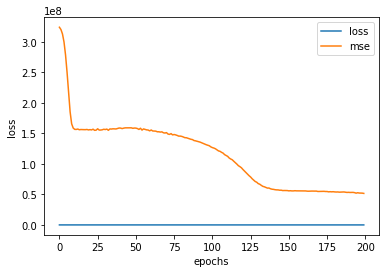

In [90]:
#Plot history (training curve)

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [91]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mse'])

history_4 = insurance_model_4.fit(X_train, y_train, epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 2ms/step - loss: 13313.9971 - mse: 323600480.0000
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 13179.2734 - mse: 319822592.0000
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 12920.9727 - mse: 312595840.0000
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 12436.7705 - mse: 299436800.0000
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 11626.3779 - mse: 278314016.0000
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 10485.0664 - mse: 249743280.0000
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 9192.6865 - mse: 216218832.0000
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 8096.6348 - mse: 184938576.0000
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 7617.7764 - mse: 165496624.0000
Epoch 10/300
30/30 [=============================

In [92]:
insurance_model_4.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3370.6555 - mse: 37174144.0000


[3370.655517578125, 37174144.0]

Text(0.5, 0, 'epochs')

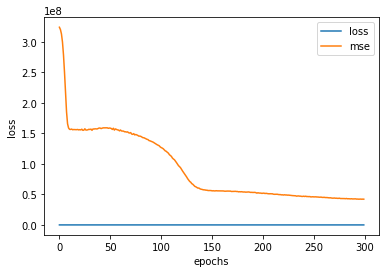

In [93]:
pd.DataFrame(history_4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Preprocessing data (normalization and standardization)

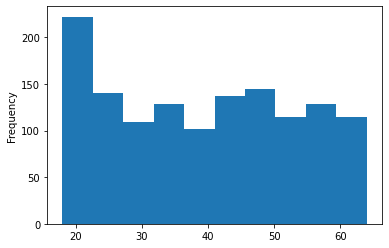

In [94]:
X['age'].plot(kind='hist')

In [95]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [97]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [98]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'children', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['region', 'sex', 'smoker'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

# Fit the column transformer to the training data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [99]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [100]:
X_train_normal[0]

array([0.60869565, 0.4       , 0.10734463, 0.4       , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        ])

In [101]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 12))

### Build a neural network  model to fit on our normalized data

In [102]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

history_4 = insurance_model_5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.4775 - mae: 13342.4775
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13332.8789 - mae: 13332.8789
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13310.2773 - mae: 13310.2773
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13263.9180 - mae: 13263.9180
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13182.2246 - mae: 13182.2246
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13053.7109 - mae: 13053.7109
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12867.6377 - mae: 12867.6377
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12613.4404 - mae: 12613.4404
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12280.4932 - mae: 12280.4932
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11863.27

In [103]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3441.0835 - mae: 3441.0835


[3441.08349609375, 3441.08349609375]

In [104]:
tf.random.set_seed(42)

insurance_model_6 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_6.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

history_6 = insurance_model_6.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 3ms/step - loss: 13342.4775 - mae: 13342.4775
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13332.8789 - mae: 13332.8789
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13310.2773 - mae: 13310.2773
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 13263.9180 - mae: 13263.9180
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13182.2246 - mae: 13182.2246
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13053.7109 - mae: 13053.7109
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 12867.6377 - mae: 12867.6377
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 12613.4404 - mae: 12613.4404
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 12280.4932 - mae: 12280.4932
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 11863.27

In [105]:
insurance_model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.3960 - mae: 3161.3960


[3161.39599609375, 3161.39599609375]